# Лабораторно робота № 3
Петро Бодруг ОІ-31

## Вступний код

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

import warnings
warnings.simplefilter('ignore')

In [3]:
ds =pd.read_csv('variant_1_preprocessed.csv')

## Базова модель

## 1. Вибір техніки моделювання
Дана система має промарковані дані, а отже буде застосовуватися навчання з вчителем. Основна ціль даної моделі це передбачити категоріальну ознаку  надавання кредиту "1" чи "0", тому подальша модель буде розвязувати задачу класифікації.

 Можливі методи : логістична регресія, SVM, або нейронні мережі.

## 2. Звіт моделювання та  припущення для обраних моделей.
* Для використання методу логістичної регресії  потрібно щоб цільова змінна була категоріальною та незалежні змінні не мають бути сильно корельованими.<br>
* Для використання матоду SVM дані повинні бути маштабовані  для полегшення побудови гіперплощини. Даний метод краще використовувати для задач з великою кількістю ознак та невеликим обсягом даних.<br>
* При використанні нейроних мереж модель потребує значної кількості даних для якісного навчання. Незалежні змінні можуть бути будь-якого типу (кількісні або категоріальні, за умови коректної обробки). А також для даної моделі потрібна висока обчислювальна потужність.


## 3. Вибір метрик
* ?Точність - точність надає загальну оцінку того, як добре модель справляється з класифікацією.
* recall - Recall допомагає визначити, наскільки добре модель знаходить усі випадки неплатоспроможних клієнтів. Високий рівень Recall зменшує ризик пропустити клієнтів, які можуть не повернути кредит (хибнонегативні результати). 
* f1- Ця метрика є корисною для незбалансованих наборів даних, оскільки дає уявлення про баланс між помилковими позитивними та помилковими негативними прогнозами. F1-оцінка є особливо важливою в контексті кредитних ризиків, де як помилкові позитивні, так і негативні рішення можуть мати значні наслідки.
* Precision- важлива  де потрібно мінімізувати кількість хибнопозитивних результатів 

## 4. Поділ даних на навчальні та тестові
 * Оскільки в мене датасет великий(150 тис.) я оберу Shuffle Split Validation з 2-3 сплітами . Я обрав його бо Shuffle Split дозволяє випадковим чином перемішувати дані і створювати різні навчальні та тестові набори. Це знижує ймовірність отримання непредставницьких наборів.
 * Кожен спліт незалежний, тому я отримую більше варіацій у даних під час навчання моделі, що покращує її узагальненість.

In [4]:
from sklearn.model_selection import ShuffleSplit
y_column = ['Status'] # target variable
X_columns = ['loan_limit', 'approv_in_adv',
       'Credit_Worthiness', 'open_credit',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term',  'interest_only',
       'property_value', 'construction_type', 'occupancy_type',
       'total_units', 'income',
       'Credit_Score', 'submission_of_application', 'LTV',
       'Gender_Joint', 'Gender_Male', 'Gender_Sex Not Available', 'loan_type_type2',
       'loan_type_type3', 'loan_purpose_p2', 'loan_purpose_p3', 'loan_purpose_p4',
       'credit_type_CRIF', 'credit_type_EXP', 'co-applicant_credit_type_EXP',
       'age_35-44', 'age_45-54', 'age_55-64',
       'age_65-74', 'age_<25', 'age_>74', 'Region_central',
       'Region_south']
X = ds[X_columns]
y = ds[y_column]

ss = ShuffleSplit(n_splits=2, test_size=0.3, random_state=0)


## 5,6 Тренування  моделей , валідація

### logistic regression

In [5]:
for train_index, test_index in ss.split(X):
    classifier = LogisticRegression()
    classifier.fit(X.iloc[train_index], y.iloc[train_index])
    y_pred = classifier.predict(X.iloc[test_index])
    print('split metric ', metrics.classification_report(y.iloc[test_index], y_pred))

split metric                precision    recall  f1-score   support

           0       0.81      0.95      0.88     33386
           1       0.68      0.33      0.44     10810

    accuracy                           0.80     44196
   macro avg       0.75      0.64      0.66     44196
weighted avg       0.78      0.80      0.77     44196

split metric                precision    recall  f1-score   support

           0       0.81      0.96      0.88     33233
           1       0.71      0.32      0.44     10963

    accuracy                           0.80     44196
   macro avg       0.76      0.64      0.66     44196
weighted avg       0.78      0.80      0.77     44196



## svm

In [6]:
ford train_index, test_index in ss.split(X):
    svm_classifier = SVC()
    svm_classifier.fit(X.iloc[train_index], y.iloc[train_index])
    y_pred = svm_classifier.predict(X.iloc[test_index])
    print('SVM split metric ', metrics.classification_report(y.iloc[test_index], y_pred))

SyntaxError: invalid syntax (821569410.py, line 1)

### Найближчого сусіда

In [7]:
for train_index, test_index in ss.split(X):
    knn_classifier = KNeighborsClassifier()  # Використовуємо K-Nearest Neighbors
    knn_classifier.fit(X.iloc[train_index], y.iloc[train_index])
    y_pred = knn_classifier.predict(X.iloc[test_index])
    
    print('KNN split metric:\n', metrics.classification_report(y.iloc[test_index], y_pred))

KNN split metric:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     33386
           1       0.65      0.56      0.60     10810

    accuracy                           0.82     44196
   macro avg       0.76      0.73      0.74     44196
weighted avg       0.81      0.82      0.81     44196

KNN split metric:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     33233
           1       0.66      0.56      0.60     10963

    accuracy                           0.82     44196
   macro avg       0.76      0.73      0.74     44196
weighted avg       0.81      0.82      0.81     44196



## 7. Валідація моделей

Зважаючи на результати, найкраще показали себе моделі найближчого сусіда  та метод опорних векторів. Хоч  метод опрних векторів показав дещо кращу точність повсіх метриках , але час для тренування моделі у 30 раз більша за KNN .Тому я обираю KNN.

## 8. Виведіть та про аналізуйте важливість ознак використовуючи метаінформацію однієї з натренованих моделей.

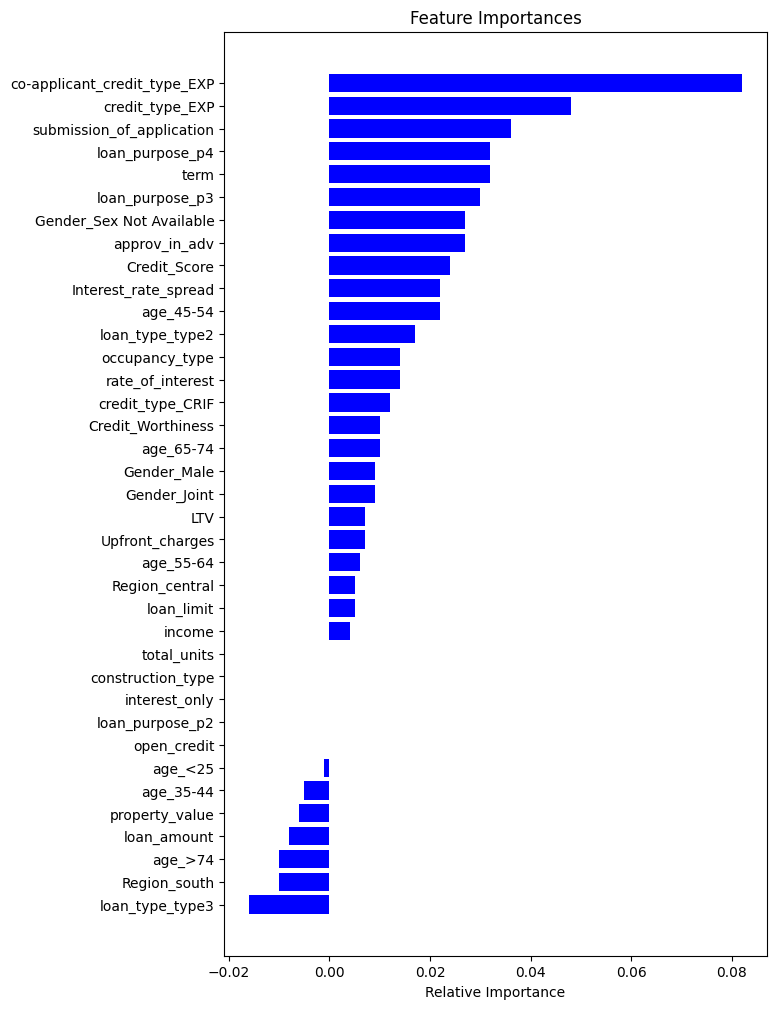

In [8]:
from sklearn.inspection import permutation_importance

# Оцінка важливості ознак за допомогою пермутаційної важливості
result = permutation_importance(knn_classifier, X[:100], y[:100], n_repeats=10, random_state=42)

# Отримання важливостей та індексів
importances = result.importances_mean
indices = np.argsort(importances)

# Візуалізація
plt.figure(figsize=(7, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


## 9. Поясніть вибір техніки моделювання та аналіз важливості ознак. Поясніть результати тренування моделей відповідно до ваших метрик.
Я обрав модель найближчого сусіда (KNN) через кілька важливих факторів:
* Швидкість виконання:  час для тренування моделі KNN у 30 разів менший, ніж для методу опорних векторів (SVC). Це особливо важливо оскільки тривалість тренування може суттєво вплинути на продуктивність та зручність роботи.
* Задовільна точність: KNN продемонстрував конкурентоспроможні результати за точністю в усіх метриках, навіть якщо SVC показав трохи кращі показники. У такому випадку KNN є хорошим вибором, оскільки він забезпечує баланс між точністю та часом виконання.
* Простота реалізації: KNN є простим у реалізації та інтерпретації. Він не вимагає складного налаштування, що може бути особливо корисним, якщо не має глибоких знань у налаштуванні моделей.
* Адаптивність до змін: KNN є адаптивним методом, який може добре працювати з різними типами даних і не вимагає строгих припущень про розподіл даних.

результати показують, що KNN і SVC демонструють хороші показники точності, однак важливо також врахувати такі метрики:

* Точність (Precision): Вказує на те, скільки з передбачених позитивних класів були дійсно позитивними. Висока точність свідчить про надійність моделі у прогнозуванні позитивних випадків.

* Повнота (Recall): Вимірює, скільки з дійсних позитивних класів були правильно виявлені моделлю. Це важливо, якщо у вас є певні класи, які ви не хочете пропустити.

* F1-метрика: Вона є середньозваженим значенням точності та повноти. Ця метрика важлива, якщо у вас є дисбаланс у класах, оскільки вона дає більш точну картину моделі в цілому.

# Базова модель


# Моделювання


In [9]:
y_column = ['Status'] # target variable
X_columns = ['loan_limit', 'approv_in_adv',
       'Credit_Worthiness', 'open_credit',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term',  'interest_only',
       'property_value', 'construction_type', 'occupancy_type',
       'total_units', 'income',
       'Credit_Score', 'submission_of_application', 'LTV',
       'Gender_Joint', 'Gender_Male', 'Gender_Sex Not Available', 'loan_type_type2',
       'loan_type_type3', 'loan_purpose_p2', 'loan_purpose_p3', 'loan_purpose_p4',
       'credit_type_CRIF', 'credit_type_EXP', 'co-applicant_credit_type_EXP',
       'age_35-44', 'age_45-54', 'age_55-64',
       'age_65-74', 'age_<25', 'age_>74', 'Region_central',
       'Region_south']
X = ds[X_columns]
y = ds[y_column]

In [10]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

## logic regresion

In [11]:
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

NameError: name 'X_train' is not defined

## models

In [7]:

svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93     33299
           1       0.96      0.61      0.74     10897

    accuracy                           0.90     44196
   macro avg       0.92      0.80      0.84     44196
weighted avg       0.90      0.90      0.89     44196



In [51]:
# Let's train GaussianNB with default parameters

gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred = gnb_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     33299
           1       0.96      0.21      0.35     10897

    accuracy                           0.80     44196
   macro avg       0.88      0.61      0.62     44196
weighted avg       0.84      0.80      0.75     44196



In [50]:
# Let's train SGDClassifier with default parameters

sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)
y_pred = sgd_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88     33299
           1       0.81      0.20      0.32     10897

    accuracy                           0.79     44196
   macro avg       0.80      0.59      0.60     44196
weighted avg       0.79      0.79      0.74     44196



In [49]:
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train, y_train)
y_pred = kn_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     33299
           1       0.66      0.50      0.57     10897

    accuracy                           0.81     44196
   macro avg       0.75      0.71      0.72     44196
weighted avg       0.80      0.81      0.80     44196



In [47]:
# Let's train DecisionTreeClassifier with default parameters

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33299
           1       1.00      1.00      1.00     10897

    accuracy                           1.00     44196
   macro avg       1.00      1.00      1.00     44196
weighted avg       1.00      1.00      1.00     44196



In [48]:

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33299
           1       1.00      1.00      1.00     10897

    accuracy                           1.00     44196
   macro avg       1.00      1.00      1.00     44196
weighted avg       1.00      1.00      1.00     44196



In [61]:
rf_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', max_depth = 10 ,max_features='sqrt')
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_classifier, X, y, cv=5)
display(scores)
std_dev = np.std(scores)
print(f'Стандартне відхилення: {std_dev}')

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

array([1.        , 0.99962666, 0.99972848, 0.99989818, 1.        ])

Стандартне відхилення: 0.00014964300627918526
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33299
           1       1.00      1.00      1.00     10897

    accuracy                           1.00     44196
   macro avg       1.00      1.00      1.00     44196
weighted avg       1.00      1.00      1.00     44196



In [14]:

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33299
           1       1.00      1.00      1.00     10897

    accuracy                           1.00     44196
   macro avg       1.00      1.00      1.00     44196
weighted avg       1.00      1.00      1.00     44196



## Feature importance

In [15]:
# we can use Random forest classifier
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Interest_rate_spread (0.473068)
2. Upfront_charges (0.226354)
3. rate_of_interest (0.142558)
4. property_value (0.050105)
5. credit_type_EQUI (0.034390)
6. LTV (0.020208)
7. co-applicant_credit_type_EXP (0.012029)
8. loan_amount (0.007330)
9. income (0.007035)
10. lump_sum_payment (0.005337)
11. credit_type_EXP (0.003776)
12. loan_type_type2 (0.002264)
13. submission_of_application (0.001688)
14. credit_type_CRIF (0.001602)
15. loan_purpose_p3 (0.001571)
16. Neg_ammortization (0.001570)
17. loan_limit (0.001390)
18. term (0.001031)
19. approv_in_adv (0.000887)
20. loan_purpose_p4 (0.000838)
21. Credit_Score (0.000786)
22. age_45-54 (0.000570)
23. Gender_Sex Not Available (0.000569)
24. loan_type_type3 (0.000529)
25. Gender_Joint (0.000400)
26. Credit_Worthiness (0.000329)
27. Region_south (0.000211)
28. occupancy_type (0.000197)
29. open_credit (0.000172)
30. Gender_Male (0.000166)
31. total_units (0.000159)
32. business_or_commercial (0.000150)
33. interest_only (0

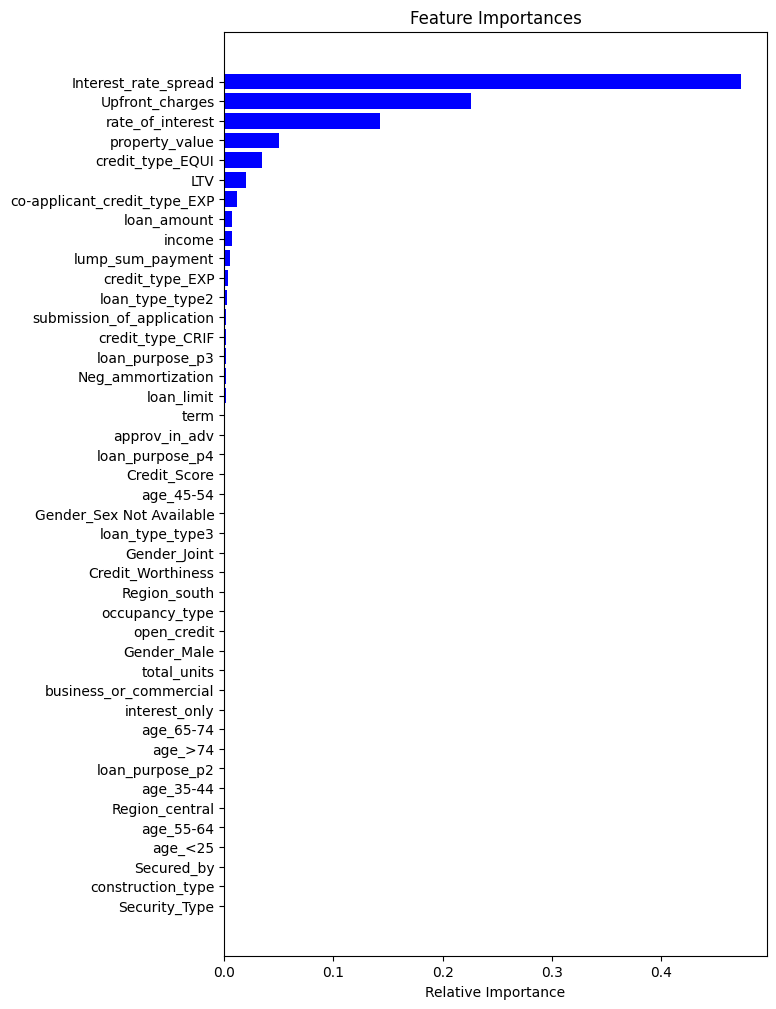

In [16]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(7, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [17]:
from sklearn.inspection import permutation_importance

# Let's train GradientBoostingClassifier with default parameters


gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred = gnb_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

imps = permutation_importance(gnb_classifier, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     33299
           1       1.00      0.46      0.63     10897

    accuracy                           0.87     44196
   macro avg       0.93      0.73      0.78     44196
weighted avg       0.89      0.87      0.85     44196

Feature ranking:
1. Interest_rate_spread (0.083659)
2. credit_type_EQUI (0.071939)
3. lump_sum_payment (0.006141)
4. Upfront_charges (0.004869)
5. rate_of_interest (0.003448)
6. total_units (0.000475)
7. loan_purpose_p2 (0.000204)
8. Secured_by (0.000172)
9. construction_type (0.000172)
10. Security_Type (0.000172)
11. Neg_ammortization (0.000109)
12. loan_amount (0.000077)
13. Credit_Worthiness (0.000059)
14. age_>74 (0.000045)
15. loan_purpose_p4 (0.000041)
16. open_credit (0.000036)
17. LTV (0.000036)
18. income (0.000032)
19. approv_in_adv (0.000032)
20. Gender_Joint (0.000032)
21. occupancy_type (0.000018)
22. Region_south (0.000014)
23. credit_type_EXP (0.000

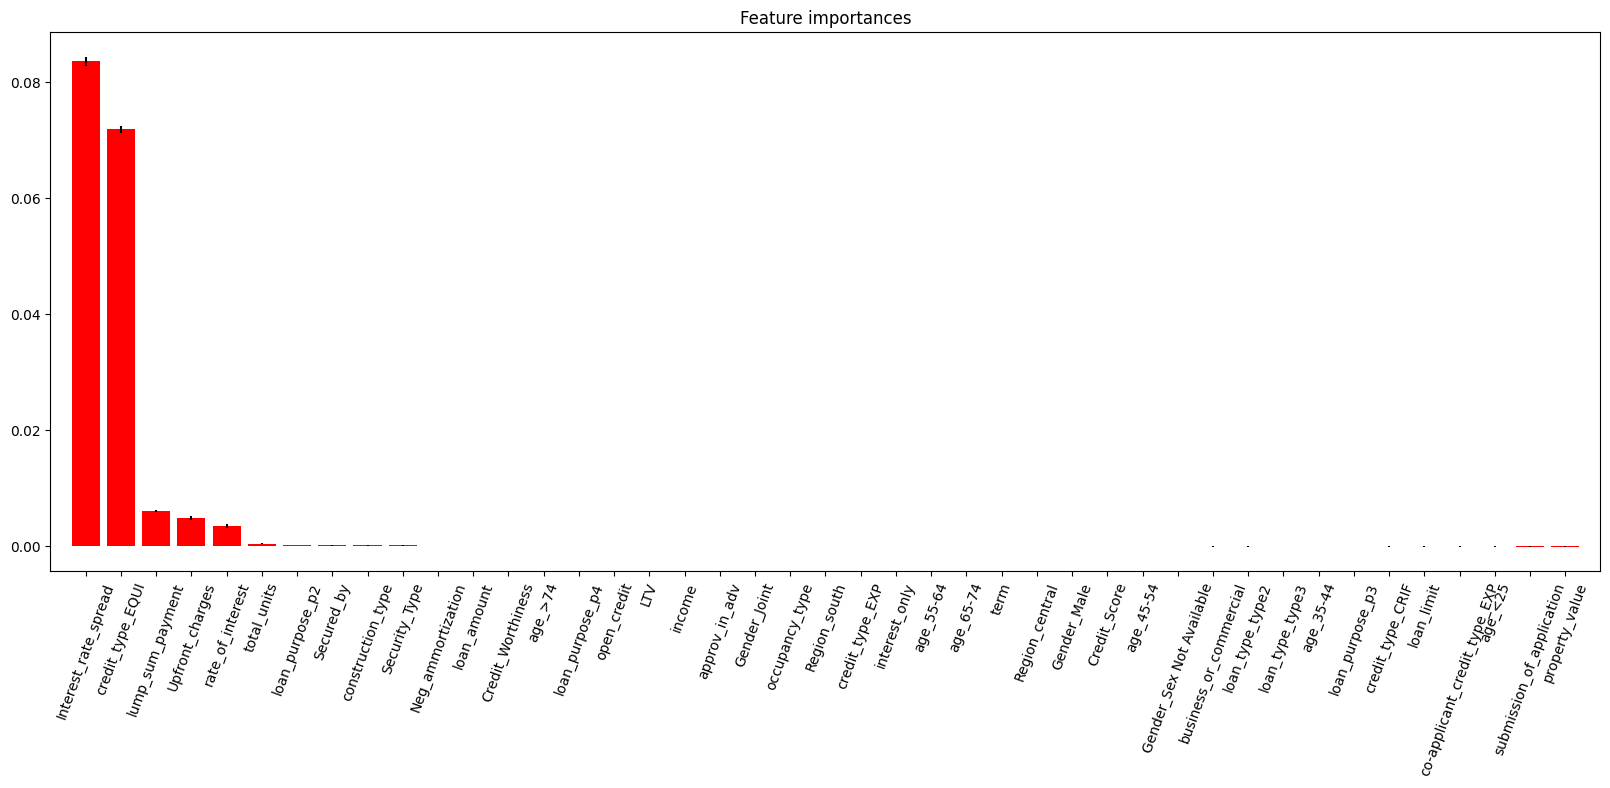

In [18]:
plt.figure(figsize=(20, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_columns[indices[f]] for f in range(X_train.shape[1])])
plt.xticks(rotation=70)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Висновок
Вибір KNN як моделі для  завдання базується на оптимальному співвідношенні точності та швидкості виконання. Також аналіз важливості ознак дозволяє  глибше зрозуміти, як  модель приймає рішення, і дає можливість вдосконалити ваші дані та моделі в майбутньому.